In [1]:
import numpy as np
import scipy.stats as sts

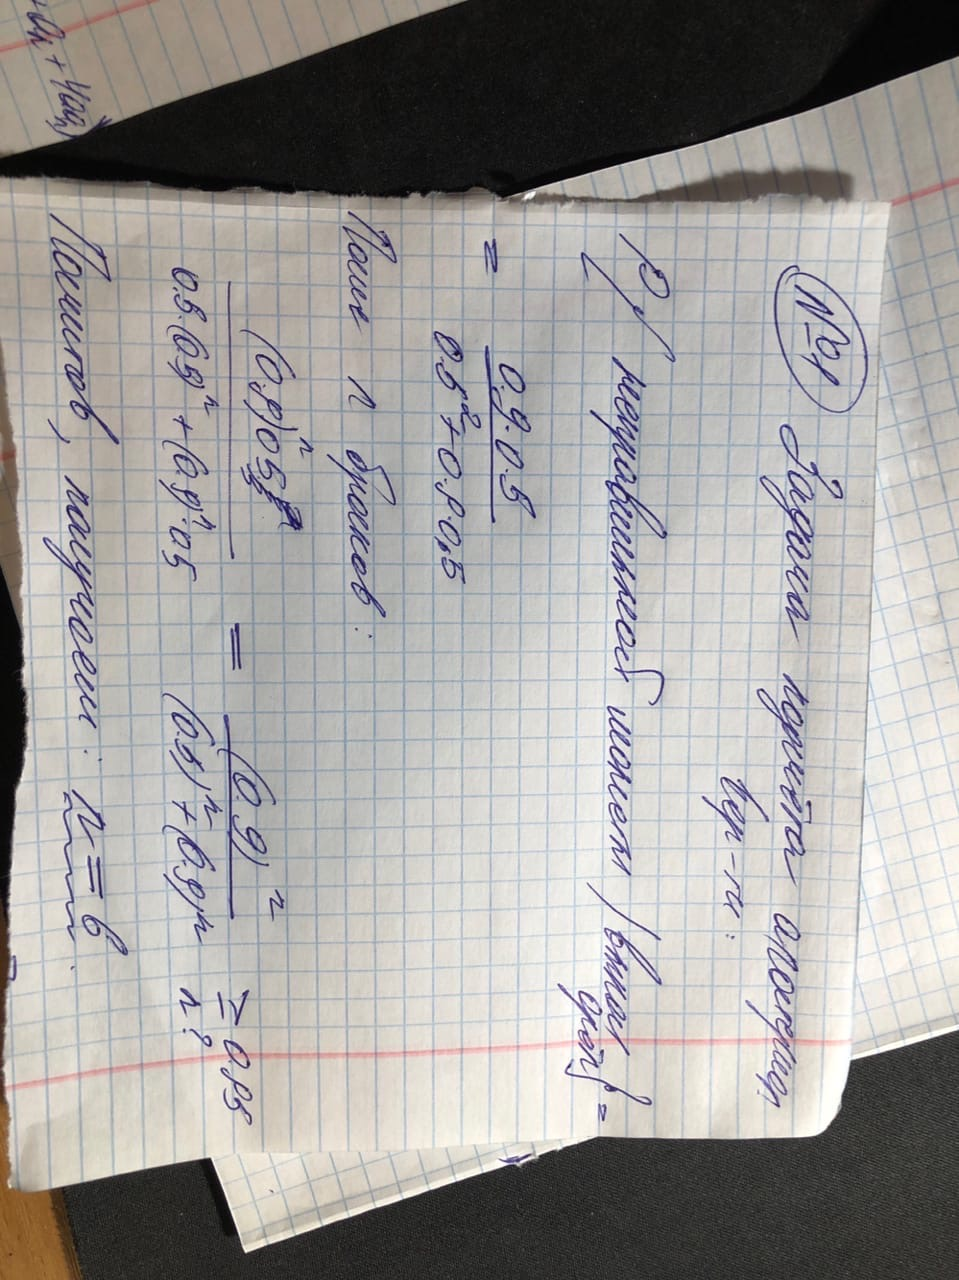

In [164]:
from IPython.display import Image
Image("ex1.jpg")

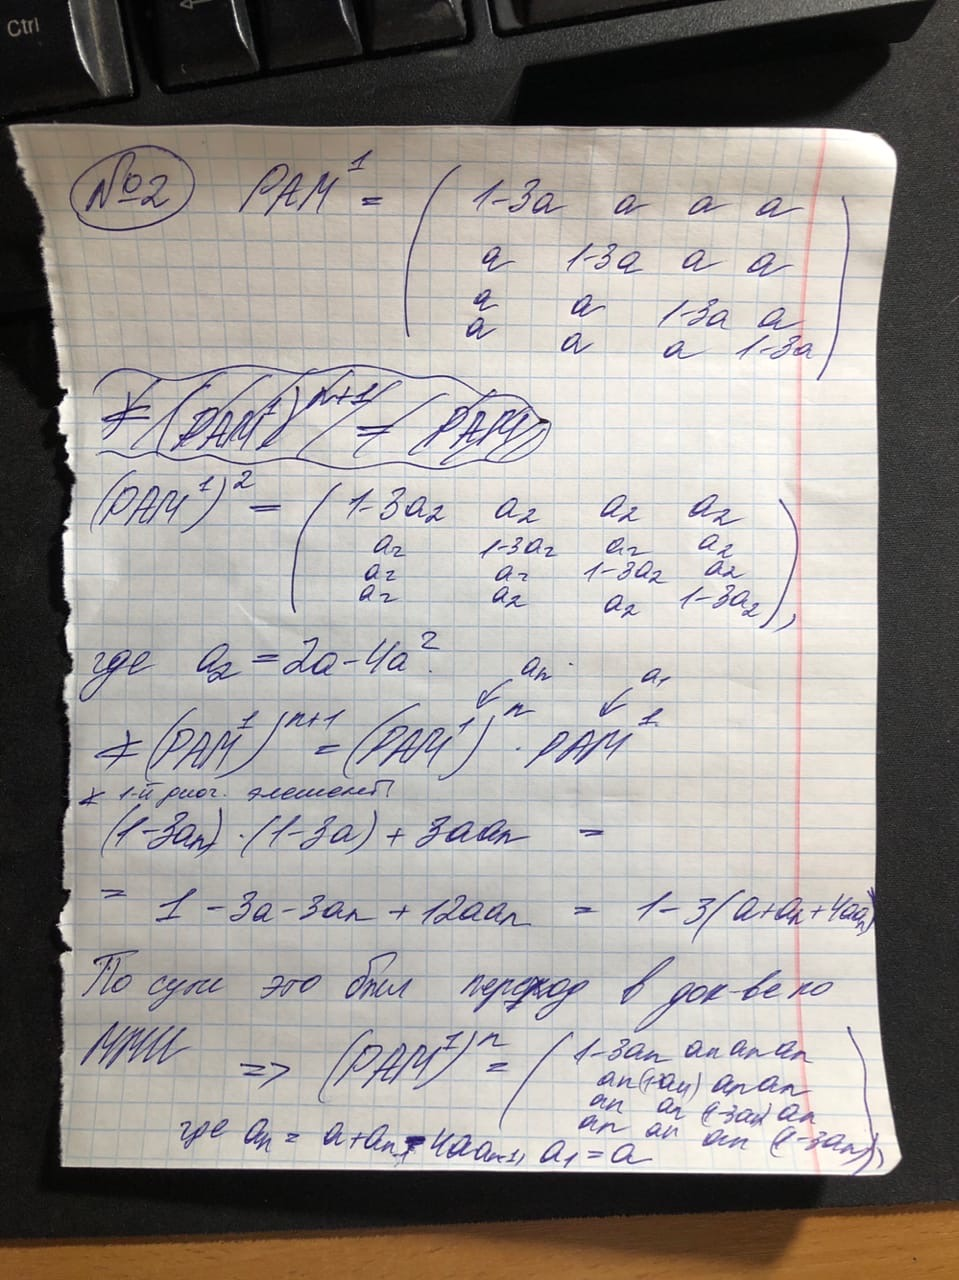

In [165]:
from IPython.display import Image
Image("ex2.jpg")

### Viterbi

In [111]:
import numpy as np

def viterbi(y, A, B, Pi=None):
    ''' Calculating Viterbi'''
    
    K = A.shape[0]
    # Init
    Pi = Pi if Pi is not None else np.full(K, 1 / K)
    T = len(y)
    T1 = np.empty((K, T))
    T2 = np.empty((K, T), 'B')

    # Init
    T1[:, 0] = Pi * B[:, y[0]]
    T2[:, 0] = 0

    # iterations throught sequence
    for i in range(1, T):
        #print(T1[:, i - 1])
        #print(A.T)
        T1[:, i] = np.max(T1[:, i - 1] * A.T * B[np.newaxis, :, y[i]].T, 1)
        T2[:, i] = np.argmax(T1[:, i - 1] * A.T, 1)

    # Building the output
    x = np.empty(T, 'B')
    x[-1] = np.argmax(T1[:, T - 1])
    for i in reversed(range(1, T)):
        x[i - 1] = T2[x[i], i]
    #print(T1)
    print(x)
    return x, T1, T2

In [156]:
y = list('ОРОРОРООРРРРРРРРРРОООООООО')
res_arr = []
for res in y:
    if res == 'О':
        res_arr.append(1)
    else:
        res_arr.append(0)
A = np.zeros(shape = (2,2))
A[0][0] = 0.8
A[1][0] = 0.2
A[0][1] = 0.2
A[1][1] = 0.8
B = np.zeros(shape = (2,2))
B[0][0] = 0.5
B[0][1] = 0.5
B[1][0] = 0.1
B[1][1] = 0.9

x, T1, T2 = viterbi(res_arr, A, B, Pi = [0.5, 0.5])
#res_arr

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


In [157]:
A = np.zeros(shape = (2,2))
A[0][0] = 0.5
A[1][0] = 0.5
A[0][1] = 0.5
A[1][1] = 0.5
B = np.zeros(shape = (2,2))
B[0][0] = 0.5
B[0][1] = 0.5
B[1][0] = 0.51
B[1][1] = 0.49

x, T1, T2 = viterbi(res_arr, A, B, Pi = [0.5, 0.5])

[0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


In [153]:
y = 'O Р O Р O Р O O O O O O'.split()
res_arr = []
for res in y:
    if res == 'O':
        res_arr.append(1)
    else:
        res_arr.append(0)
        
A = np.zeros(shape = (2,2))
A[0][0] = 0.8
A[1][0] = 0.2
A[0][1] = 0.2
A[1][1] = 0.8
B = np.zeros(shape = (2,2))
B[0][0] = 0.5
B[0][1] = 0.5
B[1][0] = 0.1
B[1][1] = 0.9

x, T1, T2 = viterbi(res_arr, A, B, Pi = [0.5, 0.5])

[0 0 0 0 0 0 1 1 1 1 1 1]


### Forward-Backward

In [158]:
def forward(obs_seq):
        T = len(obs_seq)
        N = A.shape[0]
        alpha = np.zeros((T, N))
        alpha[0] = pi*B[:,obs_seq[0]]
        for t in range(1, T):
            alpha[t] = alpha[t-1].dot(A) * B[:, obs_seq[t]]
        return alpha

def likelihood(obs_seq):
        # calculating alpha(T)
        return  forward(obs_seq)[-1].sum()
    
def backward(obs_seq):
        N = A.shape[0]
        T = len(obs_seq)

        beta = np.zeros((N,T))
        beta[:,-1:] = 1

        for t in reversed(range(T-1)):
            for n in range(N):
                beta[n,t] = np.sum(beta[:,t+1] * A[n,:] * B[:, obs_seq[t+1]])

        return beta
def gamma(obs_seq):
    alpha = forward(obs_seq)
    beta  = backward(obs_seq)
    obs_prob = likelihood(obs_seq)
    return (np.multiply(alpha,beta.T) / obs_prob)

In [160]:
A = np.zeros(shape = (2,2))
A[0][0] = 0.8
A[1][0] = 0.2
A[0][1] = 0.2
A[1][1] = 0.8
B = np.zeros(shape = (2,2))
B[0][0] = 0.5
B[0][1] = 0.5
B[1][0] = 0.1
B[1][1] = 0.9
pi = np.array([0.5, 0.5])

apo = gamma(res_arr)

np.argmax(apo, 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1])

In [162]:
apo

array([[0.50505051, 0.49494949],
       [0.4950495 , 0.5049505 ],
       [0.50505051, 0.49494949],
       [0.4950495 , 0.5049505 ],
       [0.50505051, 0.49494949],
       [0.4950495 , 0.5049505 ],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949]])

In [161]:
A = np.zeros(shape = (2,2))
A[0][0] = 0.5
A[1][0] = 0.5
A[0][1] = 0.5
A[1][1] = 0.5
B = np.zeros(shape = (2,2))
B[0][0] = 0.5
B[0][1] = 0.5
B[1][0] = 0.51
B[1][1] = 0.49

apo = gamma(res_arr)

np.argmax(apo, 1)

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0])

In [163]:
apo

array([[0.50505051, 0.49494949],
       [0.4950495 , 0.5049505 ],
       [0.50505051, 0.49494949],
       [0.4950495 , 0.5049505 ],
       [0.50505051, 0.49494949],
       [0.4950495 , 0.5049505 ],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.4950495 , 0.5049505 ],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949],
       [0.50505051, 0.49494949]])